In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
#KNN Classification Algorithm
class KNN :
    def __init__(self, k=3):
        self.K=k

    def train(self, X,y):
        self.X_train = X
        self.y_train = y

    def thePredict(self,X):
        y_predict = [self._predict(x) for x in X]
        return np.array(y_predict)

    def _predict(self,x):
        #1.Count Distance To All Data Training
        distance = [self.theDistance(x,x_train) for x_train in self.X_train]
        #2.Sort Distance Using The K Value
        best_k = np.argsort(distance)[:self.K]
        #3.Get The Best K Value
        best_k_value = [self.y_train[i] for i in best_k]
        #4.Vote The K Value
        result = Counter(best_k_value).most_common(1)
        return result[0][0]

    def theDistance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2)) 

In [3]:
#Importing Data
wine=pd.read_table("winequality-white.csv",sep = ';')

      class
High   3258
Low    1640


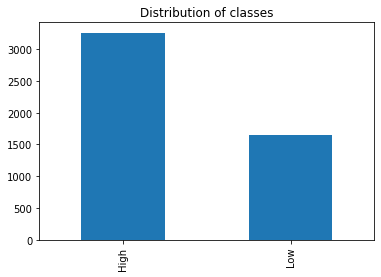

In [4]:
#Creating the Class Attribute
wine['class'] = ['Low' if i <= 5 else "High" for i in wine.quality]
wine['class'].value_counts().plot(kind = 'bar', title = 'Distribution of classes')

# Dropping Quality Attribute
wine.drop(columns = ['quality'], inplace = True)

#Paritioning Dependent Attributes From The Independent Attributes
wine_data = wine[wine.columns[wine.columns != 'class']].copy()
wine_label = wine['class'].copy()
print(pd.DataFrame(wine_label.value_counts()))

In [5]:
 #Show The First 10 Value Of Datasets
print(wine.shape)
wine.head(10)

(4898, 12)


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,High
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,High
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,High
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,High
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,High
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,High
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,High
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11,High


In [6]:
#Show The Dataset Describe
print(wine.shape)
wine.describe()

(4898, 12)


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,1.548363,3.188267,0.489847
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,6.838541,0.151001,0.114126
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,103.898000,3.820000,1.080000


In [7]:
#Show The Dataset Correlation Using Pearson Method
print(wine.shape)
wine.corr(method = 'pearson')

(4898, 12)


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates
fixedAcidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.072881,-0.425858,-0.017143
volatileAcidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.011953,-0.031915,-0.035728
citricAcid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.050018,-0.163748,0.062331
residualSugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.223895,-0.194133,-0.026664
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.027100,-0.090439,0.016763
freeSulfurDioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.046398,-0.000618,0.059217
totalSulfurDioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.098703,0.002321,0.134562
density,0.072881,0.011953,0.050018,0.223895,0.027100,0.046398,0.098703,1.000000,-0.043552,0.053210
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.043552,1.000000,0.155951
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.053210,0.155951,1.000000


In [8]:
#Search Top Corelation Pairs
correlated_pairs = wine.corr()
top_correlated_pairs = correlated_pairs.unstack().sort_values(kind="quicksort")
pd.DataFrame(top_correlated_pairs[((top_correlated_pairs < -0.5) & (top_correlated_pairs > -1)) | ((top_correlated_pairs>0.5) & (top_correlated_pairs <1))], columns = ['Coefficient'])

,,Coefficient
totalSulfurDioxide,freeSulfurDioxide,0.615501
freeSulfurDioxide,totalSulfurDioxide,0.615501


In [9]:
#Dropping Non Used Attribute 
wine.drop(columns = ['freeSulfurDioxide','totalSulfurDioxide', 'density', 'chlorides'], inplace = True)

## Boxplot


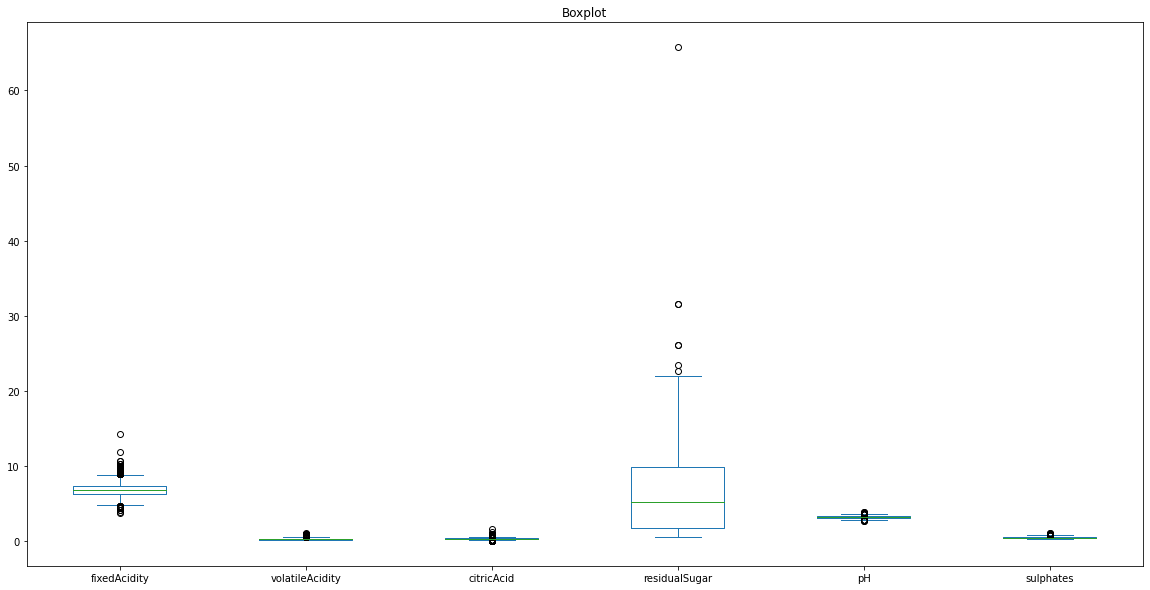

In [15]:
#Show The Dataset Boxplot
print('## Boxplot')
wine.plot(kind = 'box', figsize = (20,10), title = 'Boxplot')

In [16]:
#Show The First 10 Value Of Datasets After Non Used Attribute Dropped
print(wine.shape)
wine.head(10)

(4898, 8)


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,pH,sulphates,alcohol,class
0,7.0,0.27,0.36,20.7,3.00,0.45,8.8,High
1,6.3,0.30,0.34,1.6,3.30,0.49,9.5,High
2,8.1,0.28,0.40,6.9,3.26,0.44,10.1,High
3,7.2,0.23,0.32,8.5,3.19,0.40,9.9,High
4,7.2,0.23,0.32,8.5,3.19,0.40,9.9,High
5,8.1,0.28,0.40,6.9,3.26,0.44,10.1,High
6,6.2,0.32,0.16,7.0,3.18,0.47,9.6,High
7,7.0,0.27,0.36,20.7,3.00,0.45,8.8,High
8,6.3,0.30,0.34,1.6,3.30,0.49,9.5,High
9,8.1,0.22,0.43,1.5,3.22,0.45,11,High


In [17]:
#Deviding Dataset, 90% Datatrain & 10% Datatest 
X = np.array(wine_data)
y = np.array(wine_label)
X_Train , X_Test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [18]:
print(X_Train)
print(y_train)

[[7.0 0.32 0.24 ... 3.23 0.62 '9.4']
 [5.3 0.275 0.24 ... 3.38 0.51 '11']
 [6.9 0.24 0.37 ... 3.19 0.34 '12.4']
 ...
 [6.1 0.28 0.25 ... 3.34 0.48 '9.5']
 [8.2 0.2 0.36 ... 3.05 0.3 '10.3']
 [6.4 0.32 0.26 ... 3.14 0.5 '9.6']]
['High' 'High' 'High' ... 'Low' 'High' 'Low']


In [19]:
#Predict Datatest Using Datatrain & KNN Classification Algorithm
df = pd.DataFrame(X_Test)
df2 = pd.DataFrame(y_train)
df3 = pd.DataFrame(X_Train)
model = KNN(k=3)
model.train(df3, y_train)
hasil = model.thePredict(df)
print(hasil)

['High' 'High' 'High' 'Low' 'Low' 'High' 'High' 'High' 'High' 'High'
 'High']


In [20]:
#Accuration Test
true_values = pd.DataFrame(hasil)
prediction = pd.DataFrame(y_test)
true_values = true_values.combine_first(prediction)
accuracy = np.sum(true_values == prediction)/len(true_values)
print("Accuracy Level : ", accuracy)

Accuracy Level :  0    0.989796
dtype: float64
